## Abstract: 

The assignment gave the liberty to select dataset, so I have decided to use, AirBnB listing dataset, which has 37 features and log price of that particular listing as output. The dataset contains 74,112 records from which 80% data is used for training of different models, while 20% test data is used for evaluation of that model. First task that I performed on data is to do a exploratory data analysis to reduce number of feature and get a hint about how data is distributed and how clean data is. I have removed some of the unnecessary features such as URL to the listing, thumbnails. Also, performed Principal Component Analysis(PCA) in order to reduce the dimensions of the features. I then performed correlation analysis by plotting cor plot between features and output to know more about the data. Then I performed label encoding for data that was represented by strings to convert them into categorical numerical values. Using different Feature extraction techniques like Forward Feature Selection, LASSO, Recurrsive Feature Elimination(RFE) ranks of the features were calculated. Using the ranks I I, tried to fit a linear model with those features and got the P values out of it. Then I checked whether or not the model was violating any of the assumptions that were made by using scatter plots to check linear relations between features, QQ plots to check multivariate normality, Homoscedasticity Test. Then I trained the Linear Regression model,plotted the residuals and calculated AIC,BIC and R^2. I also performed cross validation to ensure the model was not overfitting. Then in the same notebook, I trained a logistic regression model over the same dataset with same split on the dataset, again validated the assumptions which are mentioned in detail in the notebook. One more think I did was to print out the confidence interval of each feature used in the model to understand the model better. I have also applied the stepwise regression model on data and introduced bias on the linear regression line by regularising it.

## AirBnB listings Dataset Model-2

In [682]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
from scipy import stats 
import seaborn as sns
import statsmodels.api as sm 
import re 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression 
from statsmodels.formula.api import ols

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import Imputer
from sklearn import preprocessing 
from sklearn.pipeline import make_pipeline
import math
from sklearn import metrics 


In [683]:
df = pd.read_csv("train_backup.csv")
import copy 
df_copy = copy.copy(df)

## Exploratory Data Analysis 

In [684]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [685]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


### Droping unnecessary fields from the dataset 

In [686]:
df.drop('name', axis = 1, inplace = True)


In [687]:
df.drop('thumbnail_url', axis = 1, inplace = True)


In [688]:
df.drop('description', axis = 1, inplace = True)

In [689]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating', 'zipcode',
       'bedrooms', 'beds'],
      dtype='object')

In [690]:
df1 = df.sort_values('log_price', ascending = False)
df1['log_price']

42672    7.600402
19210    7.600402
60071    7.600402
55453    7.600402
72609    7.600402
28420    7.598399
20722    7.598399
9390     7.598399
61826    7.598399
3063     7.598399
54994    7.598399
49540    7.595890
58794    7.590852
2362     7.588324
21155    7.575585
43304    7.575585
9349     7.575585
37424    7.575585
24031    7.575585
39465    7.575585
49711    7.575585
401      7.569412
28720    7.549609
32298    7.549609
61435    7.549609
23121    7.549609
68844    7.549609
71168    7.549609
12106    7.549609
7832     7.546974
           ...   
6515     2.302585
27021    2.302585
60206    2.302585
50577    2.302585
23917    2.302585
56638    2.302585
26000    2.302585
70293    2.302585
21282    2.302585
25655    2.302585
53289    2.302585
19806    2.302585
28685    2.302585
66843    2.302585
66762    2.302585
25239    2.302585
23304    2.302585
57623    2.302585
53916    2.302585
65588    2.302585
52000    2.302585
48734    2.302585
43269    2.302585
4466     2.302585
53792    2

In [691]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

### Finding the relationship between the variables 

In [692]:
df.corr()

,id,log_price,accommodates,bathrooms,cleaning_fee,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
id,1.000000,-0.007178,-0.005759,-0.003951,-0.003059,-0.003021,-0.001379,0.002945,0.000307,-0.007521,-0.008665
log_price,-0.007178,1.000000,0.567574,0.355420,0.111191,-0.002193,-0.047529,-0.032470,0.091219,0.473212,0.442153
accommodates,-0.005759,0.567574,1.000000,0.505632,0.182306,-0.078309,-0.085160,0.041964,-0.017128,0.709258,0.810801
bathrooms,-0.003951,0.355420,0.505632,1.000000,0.053784,-0.137959,-0.135026,-0.041381,0.010537,0.589935,0.525591
cleaning_fee,-0.003059,0.111191,0.182306,0.053784,1.000000,-0.060913,-0.068505,0.110204,0.034879,0.105454,0.131632
latitude,-0.003021,-0.002193,-0.078309,-0.137959,-0.060913,1.000000,0.896065,-0.017642,-0.032858,-0.059162,-0.080294
longitude,-0.001379,-0.047529,-0.085160,-0.135026,-0.068505,0.896065,1.000000,-0.050009,-0.048801,-0.076113,-0.082150
number_of_reviews,0.002945,-0.032470,0.041964,-0.041381,0.110204,-0.017642,-0.050009,1.000000,0.011708,-0.035149,0.031109
review_scores_rating,0.000307,0.091219,-0.017128,0.010537,0.034879,-0.032858,-0.048801,0.011708,1.000000,0.011143,-0.027330
bedrooms,-0.007521,0.473212,0.709258,0.589935,0.105454,-0.059162,-0.076113,-0.035149,0.011143,1.000000,0.709416


In [693]:
df.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [694]:
def label_encoding(*args):
    le = LabelEncoder()
    for i in args:
        le.fit(df[i].fillna('0'))
        
        transformed_pt = pd.DataFrame(le.transform(df[i].fillna('0')))
        df[i+'numerical'] = transformed_pt.values
    return df


In [695]:
label_encoding('property_type','room_type','amenities','bed_type','cancellation_policy','cleaning_fee','city','neighbourhood','host_has_profile_pic','host_response_rate','host_identity_verified','instant_bookable')
df

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,amenitiesnumerical,bed_typenumerical,cancellation_policynumerical,cleaning_feenumerical,citynumerical,neighbourhoodnumerical,host_has_profile_picnumerical,host_response_ratenumerical,host_identity_verifiednumerical,instant_bookablenumerical
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,6142,4,2,1,4,78,2,0,2,0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,6269,4,2,1,4,253,2,3,1,1
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,21345,4,1,1,4,248,2,3,2,1
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,38854,4,0,1,5,326,2,0,2,0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,55413,4,1,1,2,120,2,3,2,1
5,12422935,4.442651,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,...,50079,4,2,1,5,392,2,3,2,1
6,11825529,4.418841,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,moderate,True,...,63351,4,1,1,3,0,2,3,1,1
7,13971273,4.787492,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,...,22670,4,1,1,3,151,2,3,2,0
8,180792,4.787492,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,True,...,22639,4,1,1,5,457,2,3,1,0
9,5385260,3.583519,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,moderate,True,...,3774,4,1,1,3,0,2,3,1,1


### Forward Selection using LassoCV()


In [696]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
predictor1 = df[['property_typenumerical','room_typenumerical', 'amenitiesnumerical',
       'accommodates', 'bathrooms', 'bed_typenumerical', 'cancellation_policynumerical',
       'cleaning_feenumerical', 'citynumerical', 'host_has_profile_picnumerical',
       'host_identity_verifiednumerical', 'host_response_ratenumerical',
       'instant_bookablenumerical',
       'neighbourhoodnumerical', 'number_of_reviews', 'review_scores_rating',
       'bedrooms', 'beds']].fillna(0)
target1 = df['log_price'].fillna(0)
estimator1 = LassoCV(cv = 5)
featureSelection = SelectFromModel(estimator1)
featureSelection.fit(predictor1, target1)
selectedFeatures = featureSelection.transform(predictor1)
selectedFeatures

array([[ 78., 100.],
       [253.,  93.],
       [248.,  92.],
       ...,
       [606.,  94.],
       [593.,   0.],
       [320.,  96.]])

In [697]:
predictor1.columns[featureSelection.get_support()]

Index(['neighbourhoodnumerical', 'review_scores_rating'], dtype='object')

## Backward Feature Selection Using RFE 

In [698]:
from sklearn.feature_selection import RFE
predictor = df[['property_typenumerical','room_typenumerical', 'amenitiesnumerical',
       'accommodates', 'bathrooms', 'bed_typenumerical', 'cancellation_policynumerical',
       'cleaning_feenumerical', 'citynumerical', 'host_has_profile_picnumerical',
       'host_identity_verifiednumerical', 'host_response_ratenumerical',
       'instant_bookablenumerical',
       'neighbourhoodnumerical', 'number_of_reviews', 'review_scores_rating',
       'bedrooms', 'beds']].fillna(0)

target = df['log_price'].fillna(0)
names = predictor.columns
 
#use linear regression as the model
lr = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr, n_features_to_select= 10)
rfe.fit(predictor,target)
 
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))


Features sorted by their rank:
[(1, 'accommodates'), (1, 'bathrooms'), (1, 'bedrooms'), (1, 'beds'), (1, 'citynumerical'), (1, 'cleaning_feenumerical'), (1, 'host_has_profile_picnumerical'), (1, 'host_identity_verifiednumerical'), (1, 'instant_bookablenumerical'), (1, 'room_typenumerical'), (2, 'bed_typenumerical'), (3, 'cancellation_policynumerical'), (4, 'review_scores_rating'), (5, 'host_response_ratenumerical'), (6, 'property_typenumerical'), (7, 'neighbourhoodnumerical'), (8, 'number_of_reviews'), (9, 'amenitiesnumerical')]


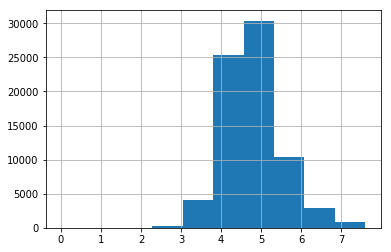

In [699]:
df['log_price'].hist()

standardizing the features in order to get the mean of zero and standard deviation of one 

In [700]:
from sklearn import preprocessing

names = df[['log_price','room_typenumerical','beds','citynumerical','instant_bookablenumerical','neighbourhoodnumerical','review_scores_rating']].columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df[['log_price','room_typenumerical','beds','citynumerical','instant_bookablenumerical','neighbourhoodnumerical','review_scores_rating']])
scaled_df = pd.DataFrame(scaled_df, columns = names)
scaled_df

C:\Users\sapar\Miniconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sapar\Miniconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,log_price,room_typenumerical,beds,citynumerical,instant_bookablenumerical,neighbourhoodnumerical,review_scores_rating
0,0.318608,-0.850673,-0.566820,0.598532,-0.596535,-1.043697,0.757053
1,0.484855,-0.850673,1.027907,0.598532,1.676347,-0.169865,-0.136204
2,0.271352,-0.850673,1.027907,0.598532,1.676347,-0.194832,-0.263813
3,2.562075,-0.850673,0.230543,1.444668,-0.596535,0.194648,NaN
4,-0.051767,-0.850673,-0.566820,-1.093740,1.676347,-0.833977,-6.899438
5,-0.473129,0.952445,-0.566820,1.444668,1.676347,0.524207,0.757053
6,-0.506320,-0.850673,-0.566820,-0.247604,1.676347,-1.433176,0.374228
7,0.007559,-0.850673,-0.566820,-0.247604,-0.596535,-0.679184,-0.136204
8,0.007559,0.952445,-0.566820,1.444668,-0.596535,0.848773,0.629445
9,-1.670712,0.952445,-0.566820,-0.247604,1.676347,-1.433176,-0.519029


<Figure size 3600x720 with 0 Axes>

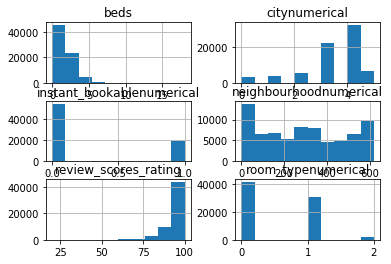

In [701]:
plt.figure(figsize=(50,10))
df[['room_typenumerical','beds','citynumerical','instant_bookablenumerical','neighbourhoodnumerical','review_scores_rating']].hist()
plt.show()

## PART A: Linear Model 

## Is the relationship significant? 

checking the p-value of every independent variable describes the realtionship with the dependent variable this is done by examining the null hypothesis H0 

Here, every feature have a p-value less than 0.5 (level of significance) thus they have a relationship with the log_price

In [702]:
model1 = ols("log_price ~ instant_bookablenumerical + room_typenumerical + beds + neighbourhoodnumerical + citynumerical + review_scores_rating", data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     9925.
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        20:31:08   Log-Likelihood:                -37849.
No. Observations:               57327   AIC:                         7.571e+04
Df Residuals:                   57320   BIC:                         7.577e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     3.9529      0.025    157.593      0.000       3.904       4.002
instant_bookablenumerical    -0.0590      0.004    -13.272      0.000      -0.068      -0.050
room_typenumerical           -0.6637      0.004   -174.903      0.000      -0.671      -0.656
beds                          0.1596      0.002     97.552      0.000       0.156       0.163
neighbourhoodnumerical        0.0003   9.88e-06     27.340      0.000       0.000       0.000
citynumerical                 0.0522      0.002     31.799      0.000       0.049       0.055
review_scores_rating          0.0062      0.000     24.740      0.000       0.006       0.007
==============================================================================
Omnibus:                     3568.446   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9383.107
Skew:                           0.356   Prob(JB):                         0.00
Kurtosis:                       4.850   Cond. No.                     4.61e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Are any model assumptions violated? 
## Assumption 1: Linear Relationship 

### Plotting the scatter plot to find the relationship 

In [ ]:

sns.pairplot(df[['log_price','room_typenumerical','beds','citynumerical','instant_bookablenumerical','accommodates','bathrooms','neighbourhoodnumerical','review_scores_rating']], kind = "reg")

## Assumption 2: Multivariate Normality check 
Plotting a Q-Q plot for the model.Assumption 2: To check for multivariate normality in the model.This assumption can best be checked with a Q-Q-Plot.Normality can be checked with a goodness of fit test.Below graphs shows that the variables are multivariate normal


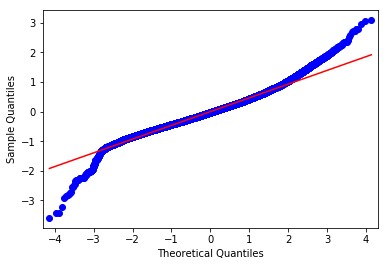

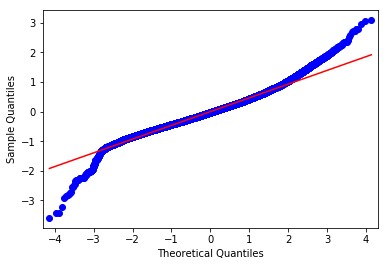

In [704]:
import statsmodels.api as statmodel
plot = model1.resid # residuals
statmodel.qqplot(plot,line='r')

## Assumption 3:  Checking for Multicollinearity 

### 1 Correlation plot

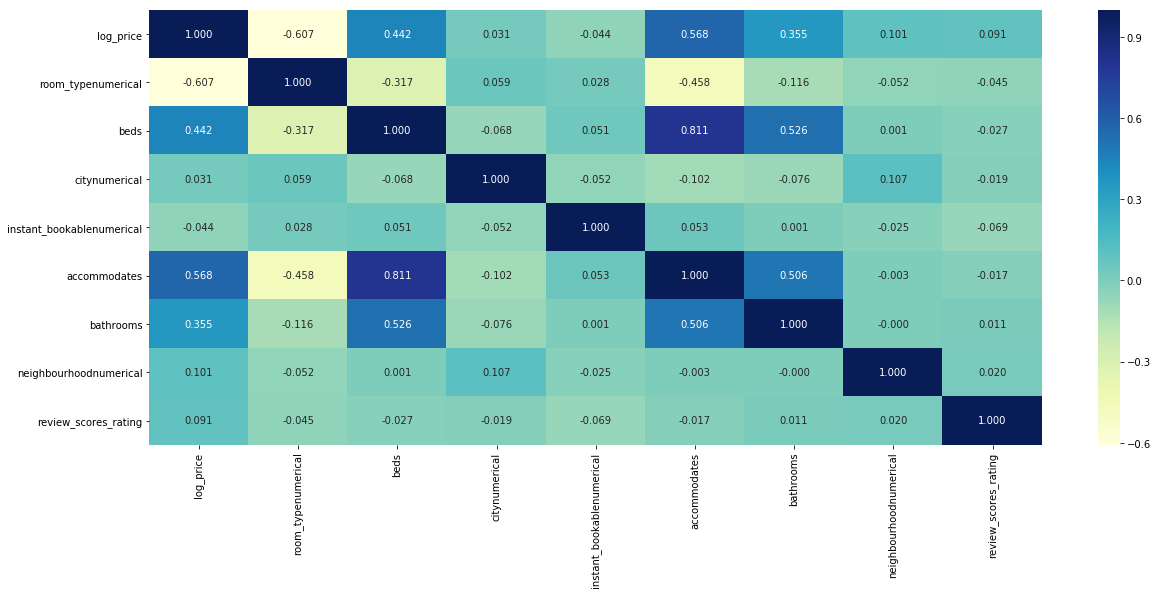

In [705]:
plt.figure(figsize=(20,8))
sns.heatmap(data = df[['log_price','room_typenumerical','beds','citynumerical','instant_bookablenumerical','accommodates','bathrooms','neighbourhoodnumerical','review_scores_rating']].corr(),cmap = 'YlGnBu', annot = True, fmt = '.3f')

plt.show()

In [706]:
### 2 Variance Inflation Factor (VIF) interpretation VIF = 1 No correaltion, 1-5 Moderate correlation, 5> Highlt correalted

#Test for Tolerance (Weisburd & Britt state that anything under .20 suggests serious multicollinearity in a model.) Thus, high tolerance(Eg: .84) indicates Low multicollinearity and low Tolerance(Eg: .12) indicates High multicollinearity  
T = 1-0.510**2
print ('Test for Tolerance: ',T)
VIF = (1/T)
print('Variance Inflation Factor',VIF)



Test for Tolerance:  0.7399
Variance Inflation Factor 1.3515339910798756


### Assumption 4 Homoscedasticity Test 


0        0.047144
1       -0.097510
2       -0.243113
3             NaN
4        0.306165
5        0.064894
6       -0.393783
7       -0.100047
8        0.339405
9       -0.521907
10       0.367508
11      -0.089672
12            NaN
13       0.119381
14       0.065579
15            NaN
16       0.088128
17       0.464929
18      -0.219988
19      -0.486178
20       0.036683
21      -0.566060
22       0.039454
23      -0.370416
24            NaN
25      -0.332956
26      -0.336371
27      -0.152866
28       0.174200
29       0.187610
           ...   
74081         NaN
74082   -0.134900
74083         NaN
74084    0.418343
74085   -0.180040
74086   -0.148606
74087   -0.554264
74088   -0.030241
74089         NaN
74090   -0.036565
74091    0.022031
74092   -0.432765
74093    0.134197
74094   -0.547694
74095         NaN
74096   -0.271862
74097    0.502907
74098   -0.421396
74099    0.133969
74100    0.206302
74101    0.420552
74102   -0.920973
74103    0.004017
74104   -0.429177
74105    0

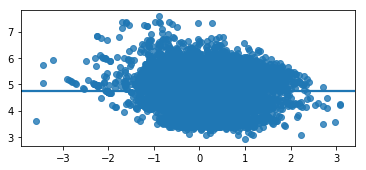

In [707]:
# residual of the entire dataset 
# assumption that all the predictor variables have the same variance around the regression line thus there sholud be no homoscedasticity
model1 = ols("log_price ~ instant_bookablenumerical + room_typenumerical + beds + neighbourhoodnumerical + citynumerical + review_scores_rating", data=df).fit()
y_pred = model1.predict(df[['room_typenumerical','beds','citynumerical','instant_bookablenumerical','neighbourhoodnumerical','review_scores_rating']])
residual = df['log_price'].values - y_pred
print(residual)
fig, ax = plt.subplots(figsize=(6,2.5))
sns.regplot(residual, y_pred)
plt.show()

### splitting the data into training and testing dataset which is of 80-20 proportion

In [708]:
trainDF = df[['room_typenumerical','beds','citynumerical','instant_bookablenumerical','neighbourhoodnumerical','review_scores_rating']]
trainDF = trainDF.fillna(0)

X = np.array(trainDF)


trainLabelDf = df['log_price']
trainLabelDf = trainLabelDf.apply(lambda x: math.exp(x))

Y = np.array(trainLabelDf)

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state = 1)

print(X_train.shape)
print(y_train.size)
X_train, y_train



(59288, 6)
59288


(array([[  0.,   1.,   5.,   0., 151., 100.],
        [  0.,   1.,   2.,   1.,   0.,   0.],
        [  0.,   1.,   3.,   0., 262.,  94.],
        ...,
        [  0.,   3.,   4.,   0.,  63.,  93.],
        [  0.,   3.,   3.,   1.,  61.,   0.],
        [  0.,   1.,   1.,   0.,   0.,  89.]]),
 array([239., 500.,  99., ..., 325., 300., 200.]))

In [709]:
ols1 = LinearRegression()
model = ols1.fit(X_train, y_train)

In [710]:
print(X_test.shape)
print(X_test)
predicted = model.predict(X_test)
predicted

(14823, 6)
[[  0.   3.   4.   0. 554. 100.]
 [  1.   2.   4.   0. 426.  95.]
 [  0.   2.   4.   0.  64.  95.]
 ...
 [  2.   1.   4.   0.  45.  95.]
 [  0.   1.   0.   0.  43.  90.]
 [  1.   1.   3.   0.   0.   0.]]


array([257.75356969, 126.09122204, 199.85687007, ..., -16.05975366,
       129.34032373, 124.26899885])

In [711]:
# R-sq value 
model.score(X_test,y_test)

0.28771834536705376

[1392.24643031  -26.09122204 -139.85687007 ...   57.05975366  105.65967627
  -39.26899885]


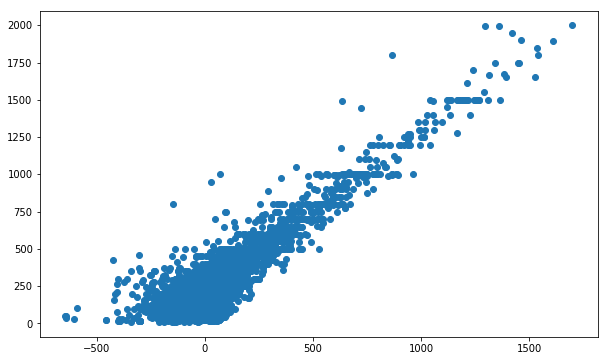

In [712]:
# residual of the model (using test data)

residual1 = y_test - predicted 
print(residual1)
fig, ax = plt.subplots(figsize=(10,6.0))
plt.scatter(residual1, y_test)

In [713]:
print(model.intercept_,model.coef_)

141.3674585928564 [-8.39458735e+01  4.74905555e+01  6.45228609e+00 -1.15871752e+01
  2.81221698e-02 -6.74743818e-01]


In [714]:
list(zip(X,model.coef_))

[(array([  0.,   1.,   4.,   0.,  78., 100.]), -83.9458735098518),
 (array([  0.,   3.,   4.,   1., 253.,  93.]), 47.49055548475088),
 (array([  0.,   3.,   4.,   1., 248.,  92.]), 6.452286093543517),
 (array([  0.,   2.,   5.,   0., 326.,   0.]), -11.587175168399522),
 (array([  0.,   1.,   2.,   1., 120.,  40.]), 0.028122169849666534),
 (array([  1.,   1.,   5.,   1., 392., 100.]), -0.674743818291935)]

In [715]:
mean_squared_error(y_test, predicted)

20961.92026743796

In [716]:
metrics.mean_absolute_error(y_test, predicted)

77.3905235544591

In [717]:
# Lower the RSME better the model 

print(np.sqrt(metrics.mean_squared_error(y_test, predicted)))

144.7823202861384


## Cross Validation of the model 


In [718]:
from sklearn.model_selection import cross_val_score, cross_val_predict

scores1 = cross_val_score(model, X, Y, cv=6)
scores1               


array([0.27022829, 0.28918386, 0.29811319, 0.27557813, 0.28755775,
       0.27306133])

In [719]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std() * 2))

Accuracy: 0.28 (+/- 0.02)


In [720]:
# A Pipeline makes it easier to compose estimators, providing this behavior under cross-validation
pip = make_pipeline(preprocessing.StandardScaler(), model)
scores = cross_val_score(pip, X, Y, cv=5)
scores

array([0.27609162, 0.29092846, 0.28070151, 0.29012026, 0.27244902])

In [721]:
r_sq = np.sqrt(scores)
r_sq.mean()

0.5310458784649386

In [722]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.28 (+/- 0.01)


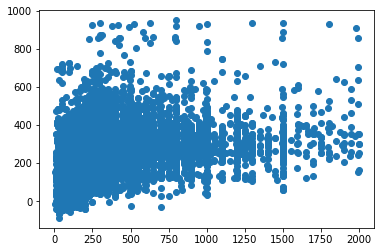

In [723]:
predictions = cross_val_predict(model, X, Y, cv=6)
plt.scatter(Y, predictions)

In [724]:
accuracy = metrics.r2_score(Y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.2823239873804919


## Compare AIC, BIC and adjusted R^2 

### AIC estimates the relative amount of information lost by a given model: the less information a model loses, the higher the quality of that model.
### BIC is a criterion for model selection among a finite set of model, the model with the lowest BIC is preferred. It is based, in part, on the likelihood function
### with AIC the penalty is 2k and with BIC its ln(n)k

### The adjusted R-squared increases only if the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected by chance. 

## PART B:  Binary Logistic Model 

In [725]:
median_price_df = df.sort_values('log_price', ascending=False)
median_price = np.array(median_price_df[['log_price']].median())

sample = pd.DataFrame(np.where(df[['log_price']].values >= median_price, 1, 0))
print(sample.size, df[['log_price']].size)
df[['log_price_numerical']] = sample
df

74111 74111


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,bed_typenumerical,cancellation_policynumerical,cleaning_feenumerical,citynumerical,neighbourhoodnumerical,host_has_profile_picnumerical,host_response_ratenumerical,host_identity_verifiednumerical,instant_bookablenumerical,log_price_numerical
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,4,2,1,4,78,2,0,2,0,1
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,4,2,1,4,253,2,3,1,1,1
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,4,1,1,4,248,2,3,2,1,1
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,4,0,1,5,326,2,0,2,0,1
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,4,1,1,2,120,2,3,2,1,1
5,12422935,4.442651,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,...,4,2,1,5,392,2,3,2,1,0
6,11825529,4.418841,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,moderate,True,...,4,1,1,3,0,2,3,1,1,0
7,13971273,4.787492,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,...,4,1,1,3,151,2,3,2,0,1
8,180792,4.787492,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,True,...,4,1,1,5,457,2,3,1,0,1
9,5385260,3.583519,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,moderate,True,...,4,1,1,3,0,2,3,1,1,0


In [726]:
df['Intercept'] = 1.0
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,cancellation_policynumerical,cleaning_feenumerical,citynumerical,neighbourhoodnumerical,host_has_profile_picnumerical,host_response_ratenumerical,host_identity_verifiednumerical,instant_bookablenumerical,log_price_numerical,Intercept
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,2,1,4,78,2,0,2,0,1,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,2,1,4,253,2,3,1,1,1,1.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,1,1,4,248,2,3,2,1,1,1.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,0,1,5,326,2,0,2,0,1,1.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,1,1,2,120,2,3,2,1,1,1.0


In [727]:
df[['room_typenumerical','beds','citynumerical','instant_bookablenumerical','neighbourhoodnumerical','review_scores_rating', 'Intercept']].isnull().sum()

room_typenumerical               0
beds                           131
citynumerical                    0
instant_bookablenumerical        0
neighbourhoodnumerical           0
review_scores_rating         16722
Intercept                        0
dtype: int64

In [728]:
def remove_outlier(df, col_name):
    q1 = df[col_name].quantile(0.10)
    q3 = df[col_name].quantile(0.90)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    out_df = df.loc[(df[col_name] > lower_bound) & (df[col_name] < upper_bound)]
    df[col_name] = out_df[col_name]
    return out_df

In [729]:
removeoutlierdf = df[['log_price_numerical','room_typenumerical','beds','citynumerical','instant_bookablenumerical','neighbourhoodnumerical','review_scores_rating', 'Intercept']]
removeoutlierdf = remove_outlier(removeoutlierdf, 'beds')
print(removeoutlierdf)
removeoutlierdf = remove_outlier(removeoutlierdf, 'review_scores_rating')

# removeoutlierdf['review_scores_rating'].isnull().sum()
trainDF_log = removeoutlierdf[['room_typenumerical','beds','citynumerical','instant_bookablenumerical','neighbourhoodnumerical','review_scores_rating','Intercept']].fillna(0)

trainLabelDf_log = removeoutlierdf[['log_price_numerical']]
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(trainDF_log, trainLabelDf_log, test_size=0.2, random_state = 1)




C:\Users\sapar\Miniconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


       log_price_numerical  room_typenumerical  beds  citynumerical  \
0                        1                   0   1.0              4   
1                        1                   0   3.0              4   
2                        1                   0   3.0              4   
3                        1                   0   2.0              5   
4                        1                   0   1.0              2   
5                        0                   1   1.0              5   
6                        0                   0   1.0              3   
7                        1                   0   1.0              3   
8                        1                   1   1.0              5   
9                        0                   1   1.0              3   
10                       0                   1   1.0              4   
11                       1                   0   2.0              3   
12                       0                   1   1.0              3   
13    

In [730]:
logistic_model = LogisticRegression()

In [731]:
logistic_model.fit(X_train_log, y_train_log)

C:\Users\sapar\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sapar\Miniconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [732]:
predicted = logistic_model.predict(X_test_log)
predicted

array([1, 0, 0, ..., 1, 0, 1])

In [733]:
print("Accuracy score using Logistic regression is %s" %metrics.accuracy_score(y_test_log, predicted))

Accuracy score using Logistic regression is 0.8000720461095101


In [734]:
# 80% of the predictions are right 
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logistic_model.score(X_test_log, y_test_log)))

Accuracy of logistic regression classifier on test set: 0.80


In [735]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test_log, predicted)
print(confusion_matrix)

[[4275 1450]
 [ 770 4609]]


## Is the relationship significant? 

checking the p-value of every independent variable describes the realtionship with the dependent variable this is done by examining the null hypothesis H0 

Here, every feature have a p-value less than 0.5 (level of significance) thus they have a relationship with the log_price

In [736]:
model_log = sm.Logit(trainLabelDf_log, trainDF_log).fit()
model_log.summary() 

Optimization terminated successfully.
         Current function value: 0.458194
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     log_price_numerical   No. Observations:                55519
Model:                           Logit   Df Residuals:                    55512
Method:                            MLE   Df Model:                            6
Date:                 Mon, 25 Feb 2019   Pseudo R-squ.:                  0.3387
Time:                         20:39:30   Log-Likelihood:                -25438.
converged:                        True   LL-Null:                       -38466.
                                         LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
room_typenumerical           -2.5624      0.024   -106.148      0.000      -2.610      -2.515
beds                          0.6867      0.015     46.589      0.000       0.658       0.716
citynumerical                 0.2258      0.009     24.125      0.000       0.207       0.244
instant_bookablenumerical    -0.2080      0.026     -8.154      0.000      -0.258      -0.158
neighbourhoodnumerical        0.0012   5.64e-05     20.459      0.000       0.001       0.001
review_scores_rating          0.0373      0.002     19.619      0.000       0.034       0.041
Intercept                    -4.6526      0.188    -24.683      0.000      -5.022      -4.283
=============================================================================================
"""

In [737]:
from sklearn.metrics import classification_report 
print(classification_report(y_test_log,predicted))

              precision    recall  f1-score   support

           0       0.85      0.75      0.79      5725
           1       0.76      0.86      0.81      5379

   micro avg       0.80      0.80      0.80     11104
   macro avg       0.80      0.80      0.80     11104
weighted avg       0.81      0.80      0.80     11104



##### Recall gives us an idea about that the actual yes, how often the model predicts yes. High recall indicates the class is correctly recognized. Which gives small number of false negatives.

##### Precision gives us idea about how many times model predicts yes when the label is yes. How often it is correct. High precision indicates that a sample labeled as positive is indeed positive. Which indicates small number of false postives.

##### F Measure is a combination of  precision and recall and gives idea about False positive and False negatives both.

## Are any model assumptions violated?
## Assumption 1: Binary logistic regression requires dependent variable to be binary 

In [ ]:
sns.pairplot(df[['log_price_numerical','room_typenumerical','beds','citynumerical','instant_bookablenumerical','neighbourhoodnumerical','review_scores_rating']])

## Assumption 2: assumption of observation independence


### Logistic regression requires the observations to be independent of each other. In other words, the observations should not come from repeated measurements or matched data
###  Independence still cannot be assessed graphically; must know how the data were collected

## Assumption 3: Absence of Multicollinearity (by plotting correlation graph)

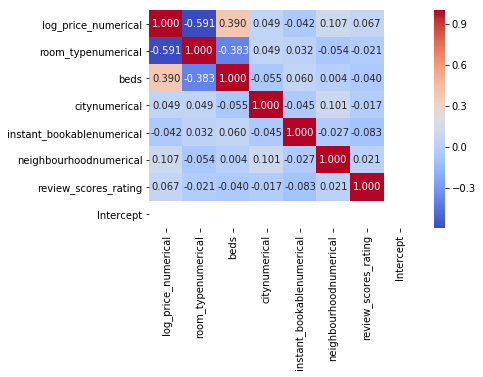

In [739]:
ax = sns.heatmap(data = removeoutlierdf.corr(),cmap = 'coolwarm',annot = True, fmt = '.3f')


## Assumption 4: Assumption of Linearity of independent variables and log odds 

Logistic regression does not require the continuous IV(s) to be linearly related to the DV. It does require the continuous IV(s) be linearly related to the log odds of the IV though. A way to test this is to plot the IV(s) in question and look for an S-shaped curve. Sometimes the S-shape will not be obvious. The plot should have a flat or flat-ish top and bottom with an increase or decreasing middle.

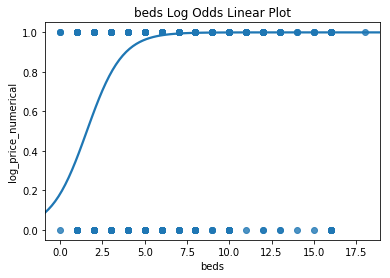

In [740]:

ax = sns.regplot(x= 'beds', y= 'log_price_numerical', data= df, logistic= True).set_title("beds Log Odds Linear Plot")


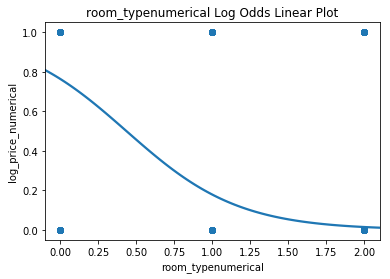

In [741]:
ax2 = sns.regplot(x= 'room_typenumerical', y= 'log_price_numerical', data= df, logistic= True).set_title("room_typenumerical Log Odds Linear Plot")


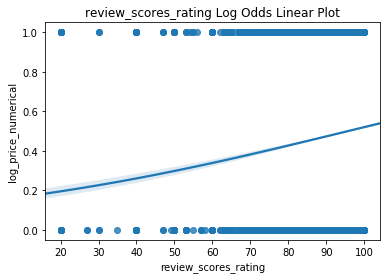

In [742]:
ax3 = sns.regplot(x= 'review_scores_rating', y= 'log_price_numerical', data= df, logistic= True).set_title("review_scores_rating Log Odds Linear Plot")


## Assumption 5: assumption of lack of outliers 

In [743]:
df[['log_price_numerical','room_typenumerical','beds','citynumerical','instant_bookablenumerical','neighbourhoodnumerical','review_scores_rating']].describe()

,log_price_numerical,room_typenumerical,beds,citynumerical,instant_bookablenumerical,neighbourhoodnumerical,review_scores_rating
count,74111.000000,74111.000000,73980.000000,74111.000000,74111.000000,74111.000000,57389.000000
mean,0.500412,0.471779,1.710868,3.292629,0.262458,287.018405,94.067365
std,0.500003,0.554599,1.254142,1.181851,0.439973,200.268746,7.836556
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,0.000000,0.000000,1.000000,3.000000,0.000000,107.000000,92.000000
50%,1.000000,0.000000,1.000000,4.000000,0.000000,263.000000,96.000000
75%,1.000000,1.000000,2.000000,4.000000,1.000000,476.000000,100.000000
max,1.000000,2.000000,18.000000,5.000000,1.000000,619.000000,100.000000


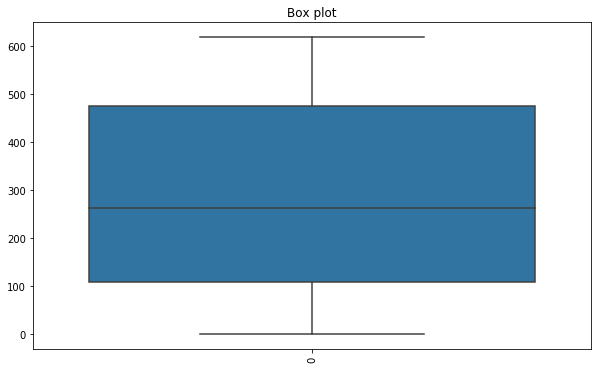

In [744]:
fig, ax = plt.subplots(figsize=(10,6))
boxplot = sns.boxplot(data= removeoutlierdf['neighbourhoodnumerical'], orient = 'v').set_title("Box plot")
plt.xticks(rotation=90)
plt.show()
# here the values of the outliers are so far away from each other thus can be kept for the purpose of analysis 

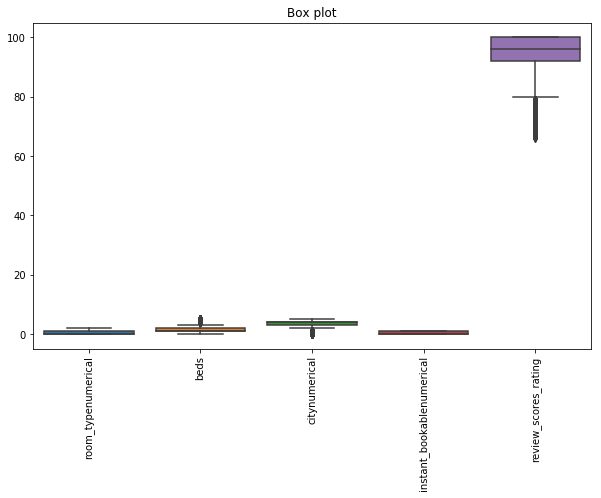

In [745]:
fig, ax = plt.subplots(figsize=(10,6))
boxplot = sns.boxplot(data= removeoutlierdf[['room_typenumerical','beds','citynumerical','instant_bookablenumerical','review_scores_rating']], orient = 'v').set_title("Box plot")
plt.xticks(rotation=90)
plt.show()


### Does the model make sense?  Interpret the meaning of each independent variable. 

The model gives an accuracy of 80%. So the model makes sense.

The features taken into consideration in this model are relevant features as these features have a high coorelation with log_price. The feature instant_bookablenumerical has a correlation of -0.042 with log_price also this feature is a binary feature where values are in 0 or 1. From the observation we come to know that if instant_bookablenumerical is 1 we have a high property price. The feature room_typenumerical have a correlation of -0.591 with the log_price. This features has a muticategorical values. From Observation we came to know as the value of room_typenumerical decreases the value of log_price increases. The next feature is beds this has a correlation of 0.39 with the log_price.

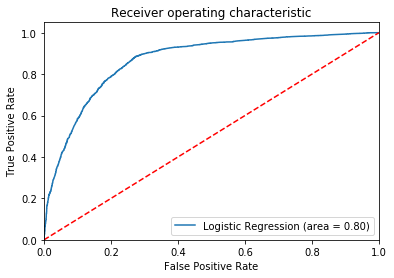

In [746]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_log, predicted)
fpr, tpr, thresholds = roc_curve(y_test_log, logistic_model.predict_proba(X_test_log)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The Above curve descibes that the model have rightly predicted the log_price values, from this curve we interept that the more the curve towrads the top-left of the refrence line better the model predicted the values.

## Cross Validation of the model 

In [747]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [748]:
scores = cross_val_score(logistic_model, trainDF_log , trainLabelDf_log, cv=6)
print("Cross-validated scores:", scores.mean())


C:\Users\sapar\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sapar\Miniconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sapar\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sapar\Miniconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sapar\Miniconda3\lib\site-packages\sklearn\li

Cross-validated scores: 0.7943946395337703


From the above cross val score we come to know the accuracy of the model which is 79%, thus the model is good for the prediction of binary values

### Calculate the probability of getting the dependent variable

In [749]:

prop = logistic_model.predict_proba(X_test_log)[:,1]
print(prop)


[0.82640867 0.22142643 0.11439218 ... 0.68136438 0.05797759 0.88093664]


### confidence interval
### model_log.conf_int(alpha=0.05, cols=None, method='default') Returns the confidence interval of the fitted parameters


In [750]:
# here it returns 95% confidence interval 
model_log.conf_int(alpha = 0.05)

,0,1
room_typenumerical,-2.609726,-2.515099
beds,0.657804,0.715581
citynumerical,0.207473,0.244166
instant_bookablenumerical,-0.258050,-0.158034
neighbourhoodnumerical,0.001043,0.001264
review_scores_rating,0.033581,0.041035
Intercept,-5.022026,-4.283157


### odds ratio
#### Take the exponential of each of the coefficients to generate the odds ratios. This tells you how a 1 unit increase or decrease in a variable affects the odds of log_price

In [751]:
np.exp(model_log.params)

room_typenumerical           0.077118
beds                         1.987132
citynumerical                1.253349
instant_bookablenumerical    0.812173
neighbourhoodnumerical       1.001154
review_scores_rating         1.038013
Intercept                    0.009537
dtype: float64

In [752]:
params = model_log.params
conf = model_log.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OddsRatio']
np.exp(conf)

,2.5%,97.5%,OddsRatio
room_typenumerical,0.073555,0.080855,0.077118
beds,1.930548,2.045375,1.987132
citynumerical,1.230565,1.276556,1.253349
instant_bookablenumerical,0.772557,0.853821,0.812173
neighbourhoodnumerical,1.001043,1.001264,1.001154
review_scores_rating,1.034151,1.041889,1.038013
Intercept,0.006591,0.013799,0.009537


## Part C: Multi-Colinearity and Step-wise Regression  

###  Considering above Linear Regression Model 

### Step-wise Regression: Backward selection using standardised coefficients 

In [753]:
model_linear = LinearRegression()
rfe = RFE(model, 4)
fit = rfe.fit(X, Y)

print("Num Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: " ,fit.ranking_)


Num Features:  4
Selected Features:  [ True  True  True  True False False]
Feature Ranking:  [1 1 1 1 3 2]


### Is there any multi-colinearity in the model? 

According to the above correlation plot there is moderate correlation between the room_typenumerical and beds which is of -0.38

### In the multiple regression models are predictor variables independent of all the other predictor variables? 

the model contains no linear relationship between these features as there is moderate multi-colinearity, thus they are independent of each other 

### In multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model.

By, using the Recurrsive Feature Elimination algorithm we extracted the best 4 features which had given a rank thus the most significant feature was ranked 1st and the least significant with lowest rank


## PART D: Interaction Effects 

Interaction effects occur when the effect of one variable depends on the value of another variable. Thus, in our model we come to know accommodates and bedrooms have highly correlated thus we can calculate the interaction effect inoder to make our model more better. The below graph shows there is significant interaction effect. 

In [668]:
df['Sum1'] = df['room_typenumerical'] * df['beds']
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,...,cleaning_feenumerical,citynumerical,neighbourhoodnumerical,host_has_profile_picnumerical,host_response_ratenumerical,host_identity_verifiednumerical,instant_bookablenumerical,log_price_numerical,Intercept,Sum1
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000,...,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.0,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868,...,0.734075,3.292629,287.018405,1.991877,11.501370,1.668727,0.262458,0.500412,1.0,0.585280
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142,...,0.441828,1.181851,200.268746,0.114589,22.746247,0.476033,0.439973,0.500003,0.0,1.066637
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000,...,0.000000,3.000000,107.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000,...,1.000000,4.000000,263.000000,2.000000,3.000000,2.000000,0.000000,1.000000,1.0,0.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000,...,1.000000,4.000000,476.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.0,1.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000,...,1.000000,5.000000,619.000000,2.000000,80.000000,2.000000,1.000000,1.000000,1.0,32.000000


In [669]:
model = ols("log_price ~ instant_bookablenumerical + neighbourhoodnumerical + citynumerical + review_scores_rating + Sum1 -1", data=df).fit()
model.params
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 5.558e+05
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        20:26:26   Log-Likelihood:                -59391.
No. Observations:               57327   AIC:                         1.188e+05
Df Residuals:                   57322   BIC:                         1.188e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
instant_bookablenumerical     0.0598      0.006      9.323      0.000       0.047       0.072
neighbourhoodnumerical        0.0005   1.43e-05     34.015      0.000       0.000       0.001
citynumerical                 0.0934      0.002     40.280      0.000       0.089       0.098
review_scores_rating          0.0467   9.45e-05    494.493      0.000       0.047       0.047
Sum1                         -0.2385      0.003    -90.247      0.000      -0.244      -0.233
==============================================================================
Omnibus:                    12837.404   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51660.446
Skew:                           1.065   Prob(JB):                         0.00
Kurtosis:                       7.134   Cond. No.                         808.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [670]:
cols_to_use_df = df[['citynumerical','instant_bookablenumerical','review_scores_rating', 'Sum1']]
estimators = cols_to_use_df.apply(lambda x: x.fillna(x.mean()),axis=0)
target = df.log_price
estimators
linreg = LinearRegression()




In [671]:
scores = cross_val_score(linreg, estimators, target, cv=6)

scores


array([0.17602099, 0.16163215, 0.18121463, 0.18970582, 0.156112  ,
       0.17911931])

In [672]:
rmse_score = np.sqrt(scores)
rmse_score.mean()

0.41686066541376654

In [673]:
predictions = cross_val_predict(linreg, estimators, target, cv=6)
predictions

array([5.00445042, 4.92683387, 4.92134024, ..., 4.92769851, 4.92806929,
       4.95580323])

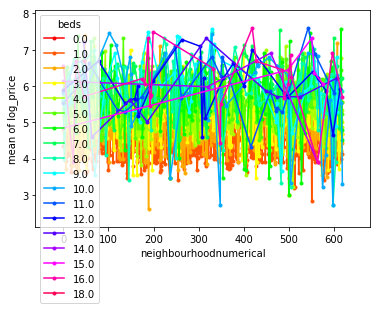

In [674]:
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(df.neighbourhoodnumerical, df.beds, df.log_price)

## PART E: Regularization 

In [675]:
from sklearn.linear_model import Ridge

ridgeModel = Ridge().fit(X_train, y_train)
predictions = ridgeModel.predict(X_test)
print(predictions)
print(ridgeModel.score(X_test, y_test))

[257.75151044 126.09364623 199.85423383 ... -16.0530398  129.33828575
 124.27067019]
0.2877180259685985


In regularization we add a bias to the regression line. We add a regulizing term to the linear regression cost function. The alpha is the regularizing parameter which is a hyperparameter. The regularization term nullifies the effect of outlier by adding a bias to the regression function, by doing this the regression line fits the data more precisely.

## Conclusion:

From our observations we can conclude that the dataset selected and features that we have used for prediction analysis show that the linear cannot be very well fitted in the dataset. The Linear regression r^2 value is very small so the variance between predictions and the test data is very large. The residual values are large and the residual plot is not very scattered over the scale. So we can say the our features and the value we are predicting do not have a linear relationship. Whereas, the logistic model does a very good job in classifying the value of price values, whether the price values in greater than median or less than the median. So, from this we conclude that the features are good for classifying the price of a property. Also experiments show that even if we try to regularize the linear model by doing ridge regression we still are getting the high variance and large residuals. From the residuals and by cross validating the model we can conclude that the model is not overfitting the data.

## contributions statement:

1. We performed the EDA process and done pre-processing of the data by cleaning the data and converting the multicategorical data to numerical values using LabelEncoding.
2. We also tried to handle the outliers, and implemented the models using different algorithms 
3. Done LASSO, RFE, PCA methods to extract and reduce different features.
Thus, from this assignment I contributed 75% out of the overal work and other 15% of the code was used from different referral documentations 

## citations:

[1] https://scikit-learn.org/stable/ - for Regression models 

[2] https://seaborn.pydata.org/ - for graphical plotting 

[3] https://pandas.pydata.org/pandas-docs/stable/ - for creating the dataFrame, data manipulation and analysis 

[4] https://towardsdatascience.com/ - concept understanding reference

[5] https://www.kaggle.com/ - for selecting the dataset 

## license:

Copyright (c) <2019> <copyright Jinal Sapariya>

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.